In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import lxml.html as lh
from PIL import Image
import urllib.request
import urllib
import pickle
import pylab as pl
import matplotlib.pyplot as plt

In [3]:
with open('pickles/benigns_df.pkl', 'rb') as handle:
    benigns_df = pickle.load(handle)
    
with open('pickles/benigns_abnormalities_df.pkl', 'rb') as handle:
    benigns_abnormalities_df = pickle.load(handle)
    
with open('pickles/cancers_df.pkl', 'rb') as handle:
    cancers_df = pickle.load(handle)
    
with open('pickles/cancers_abnormalities_df.pkl', 'rb') as handle:
    cancers_abnormalities_df = pickle.load(handle)
    
with open('pickles/normals_df.pkl', 'rb') as handle:
    normals_df = pickle.load(handle)    

## Normal

In [4]:
normals_df.columns

Index(['</pre>]', 'CASE', 'DATE_DIGITIZED', 'DATE_OF_STUDY', 'DENSITY',
       'DIGITIZER', 'FILM', 'FILM_TYPE', 'LEFT_CC', 'LEFT_MLO', 'PATIENT_AGE',
       'RIGHT_CC', 'RIGHT_MLO', '[<pre>', 'filename', 'ics_version',
       'SEQUENCE'],
      dtype='object')

In [5]:
normals_df = normals_df.drop(['</pre>]', '[<pre>','FILM','SEQUENCE'], axis=1)

In [6]:
normals_df.head(5)

,CASE,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version
0,normal_01,2 11 1995,5 3 1991,2,DBA 21,REGULAR,LINES 4349 PIXELS_PER_LINE 1979 BITS_PER_PIXEL...,LINES 5069 PIXELS_PER_LINE 2039 BITS_PER_PIXEL...,63,LINES 4334 PIXELS_PER_LINE 1874 BITS_PER_PIXEL...,LINES 5084 PIXELS_PER_LINE 2129 BITS_PER_PIXEL...,A-0002-1,1.0
1,normal_01,10 8 1995,7 3 1991,3,DBA 21,REGULAR,LINES 4514 PIXELS_PER_LINE 2084 BITS_PER_PIXEL...,LINES 5159 PIXELS_PER_LINE 2069 BITS_PER_PIXEL...,66,LINES 4679 PIXELS_PER_LINE 2114 BITS_PER_PIXEL...,LINES 5399 PIXELS_PER_LINE 2159 BITS_PER_PIXEL...,A-0003-1,1.0
2,normal_01,15 8 1995,23 10 1991,4,DBA 21,REGULAR,LINES 3959 PIXELS_PER_LINE 1799 BITS_PER_PIXEL...,LINES 4454 PIXELS_PER_LINE 1949 BITS_PER_PIXEL...,44,LINES 4139 PIXELS_PER_LINE 1904 BITS_PER_PIXEL...,LINES 5099 PIXELS_PER_LINE 2084 BITS_PER_PIXEL...,A-0005-1,1.0
3,normal_01,17 8 1995,25 3 1991,2,DBA 21,REGULAR,LINES 4874 PIXELS_PER_LINE 2429 BITS_PER_PIXEL...,LINES 4979 PIXELS_PER_LINE 2684 BITS_PER_PIXEL...,55,LINES 4994 PIXELS_PER_LINE 2309 BITS_PER_PIXEL...,LINES 5459 PIXELS_PER_LINE 2489 BITS_PER_PIXEL...,A-0006-1,1.0
4,normal_01,22 8 1995,8 4 1991,4,DBA 21,REGULAR,LINES 5534 PIXELS_PER_LINE 2969 BITS_PER_PIXEL...,LINES 5594 PIXELS_PER_LINE 3224 BITS_PER_PIXEL...,63,LINES 5339 PIXELS_PER_LINE 2684 BITS_PER_PIXEL...,LINES 5594 PIXELS_PER_LINE 2954 BITS_PER_PIXEL...,A-0009-1,1.0


In [7]:
print("Wszystkie prawdidłowe przypadki: " + str(len(normals_df)))
print("Prawdidłowe przypadki o gęstości 4: " + str(len(normals_df.loc[normals_df['DENSITY']=="4"])))

Wszystkie prawdidłowe przypadki: 694
Prawdidłowe przypadki o gęstości 4: 150


## Cancer & benign

In [8]:
benigns_df.columns

Index(['</pre>]', 'CASE', 'DATE_DIGITIZED', 'DATE_OF_STUDY', 'DENSITY',
       'DIGITIZER', 'FILM', 'FILM_TYPE', 'LEFT_CC', 'LEFT_MLO', 'PATIENT_AGE',
       'RIGHT_CC', 'RIGHT_MLO', 'SEQUENCE', '[<pre>', 'filename',
       'ics_version'],
      dtype='object')

In [9]:
benigns_df = benigns_df.drop(['</pre>]','[<pre>', 'FILM', 'SEQUENCE'], axis=1)
cancers_df = cancers_df.drop(['</pre>]','[<pre>', 'FILM', 'SEQUENCE'], axis=1)

In [10]:
benigns_df.head(3)

,CASE,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version
0,benign_01,9 10 1997,2 3 1993,3,LUMISYS LASER,REGULAR,LINES 4648 PIXELS_PER_LINE 2672 BITS_PER_PIXEL...,LINES 4680 PIXELS_PER_LINE 2664 BITS_PER_PIXEL...,66,LINES 4704 PIXELS_PER_LINE 2816 BITS_PER_PIXEL...,LINES 4648 PIXELS_PER_LINE 2864 BITS_PER_PIXEL...,C-0029-1,1.0
1,benign_01,10 10 1997,18 11 1993,3,LUMISYS LASER,REGULAR,LINES 4672 PIXELS_PER_LINE 2616 BITS_PER_PIXEL...,LINES 4664 PIXELS_PER_LINE 2424 BITS_PER_PIXEL...,60,LINES 4656 PIXELS_PER_LINE 2680 BITS_PER_PIXEL...,LINES 4680 PIXELS_PER_LINE 2752 BITS_PER_PIXEL...,C-0033-1,1.0
2,benign_01,14 4 1998,23 2 1996,2,LUMISYS LASER,REGULAR,LINES 6000 PIXELS_PER_LINE 3264 BITS_PER_PIXEL...,LINES 5992 PIXELS_PER_LINE 3368 BITS_PER_PIXEL...,56,LINES 5960 PIXELS_PER_LINE 3536 BITS_PER_PIXEL...,LINES 5944 PIXELS_PER_LINE 3752 BITS_PER_PIXEL...,C-0217-1,1.0


In [11]:
benigns_abnormalities_df.columns

Index(['</font></pre>,', '</font></pre>]', '<font', 'ASSESSMENT', 'BOUNDARY',
       'CASE', 'FILE:', 'LESION_TYPE', 'PATHOLOGY', 'SUBTLETY',
       'TOTAL_ABNORMALITIES', 'TOTAL_OUTLINES', '[<pre>', '</font><font',
       'CORE', 'CLUSTERED'],
      dtype='object')

In [12]:
cancers_abnormalities_df.columns

Index(['</font></pre>,', '</font></pre>]', '<font', 'ASSESSMENT', 'BOUNDARY',
       'CASE', 'FILE:', 'LESION_TYPE', 'PATHOLOGY', 'SUBTLETY',
       'TOTAL_ABNORMALITIES', 'TOTAL_OUTLINES', '[<pre>', '</font><font',
       'CORE'],
      dtype='object')

In [13]:
benigns_abnormalities_df = benigns_abnormalities_df.drop(['</font></pre>,', '</font></pre>]', '<font', 'BOUNDARY',\
                                                          '[<pre>', '</font><font', 'CORE', 'CLUSTERED'], axis=1)
cancers_abnormalities_df = cancers_abnormalities_df.drop(['</font></pre>,', '</font></pre>]', '<font', 'BOUNDARY',\
                                                          '[<pre>', '</font><font', 'CORE'], axis=1)

In [14]:
benigns_abnormalities_df.head(3)

,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES
0,3,benign_01,C_0029_1.LEFT_CC.OVERLAY,MASS SHAPE OVAL MARGINS ILL_DEFINED,BENIGN,3,1,1
1,4,benign_01,C_0033_1.RIGHT_CC.OVERLAY,MASS SHAPE OVAL MARGINS MICROLOBULATED,BENIGN,4,1,1
2,3,benign_01,C_0217_1.RIGHT_CC.OVERLAY,MASS SHAPE ROUND MARGINS CIRCUMSCRIBED,BENIGN,5,1,1


In [15]:
cancers_abnormalities_df['LESION_TYPE'].unique()[:5]

array(['MASS SHAPE IRREGULAR MARGINS SPICULATED',
       'CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION SEGMENTAL',
       'CALCIFICATION TYPE AMORPHOUS DISTRIBUTION CLUSTERED',
       'CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION CLUSTERED',
       'MASS SHAPE LOBULATED MARGINS CIRCUMSCRIBED'], dtype=object)

In [16]:
# tylko mass, odrzucić shape: oval i round

In [17]:
benigns_abnormalities_df['filename'] = benigns_abnormalities_df.apply(lambda row: row['FILE:'].split('.')[0].replace('_','-'), axis=1)
cancers_abnormalities_df['filename'] = cancers_abnormalities_df.apply(lambda row: row['FILE:'].split('.')[0].replace('_','-'), axis=1)

In [18]:
benigns_abnormalities_df.head()

,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES,filename
0,3,benign_01,C_0029_1.LEFT_CC.OVERLAY,MASS SHAPE OVAL MARGINS ILL_DEFINED,BENIGN,3,1,1,C-0029-1
1,4,benign_01,C_0033_1.RIGHT_CC.OVERLAY,MASS SHAPE OVAL MARGINS MICROLOBULATED,BENIGN,4,1,1,C-0033-1
2,3,benign_01,C_0217_1.RIGHT_CC.OVERLAY,MASS SHAPE ROUND MARGINS CIRCUMSCRIBED,BENIGN,5,1,1,C-0217-1
3,4,benign_01,C_0235_1.RIGHT_CC.OVERLAY,MASS SHAPE OVAL MARGINS MICROLOBULATED,BENIGN,5,1,1,C-0235-1
4,4,benign_01,C_0237_1.LEFT_CC.OVERLAY,MASS SHAPE ROUND MARGINS CIRCUMSCRIBED,BENIGN,4,1,1,C-0237-1


In [19]:
# benigns_abnormalities_df.loc["CALCIFICATION" not in benigns_abnormalities_df['LESION_TYPE']]
benigns_abnormalities_df[benigns_abnormalities_df['LESION_TYPE'].str.contains("CALCIFICATION")==False].head()

,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES,filename
0,3,benign_01,C_0029_1.LEFT_CC.OVERLAY,MASS SHAPE OVAL MARGINS ILL_DEFINED,BENIGN,3,1,1,C-0029-1
1,4,benign_01,C_0033_1.RIGHT_CC.OVERLAY,MASS SHAPE OVAL MARGINS MICROLOBULATED,BENIGN,4,1,1,C-0033-1
2,3,benign_01,C_0217_1.RIGHT_CC.OVERLAY,MASS SHAPE ROUND MARGINS CIRCUMSCRIBED,BENIGN,5,1,1,C-0217-1
3,4,benign_01,C_0235_1.RIGHT_CC.OVERLAY,MASS SHAPE OVAL MARGINS MICROLOBULATED,BENIGN,5,1,1,C-0235-1
4,4,benign_01,C_0237_1.LEFT_CC.OVERLAY,MASS SHAPE ROUND MARGINS CIRCUMSCRIBED,BENIGN,4,1,1,C-0237-1


In [20]:
len(benigns_abnormalities_df['filename'].unique())

851

In [21]:
len(benigns_abnormalities_df)

855

In [22]:
benigns_abnormalities_df.sort_values(by=['filename']).head(3)

,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES,filename
70,4,benign_02,A_1123_1.LEFT_CC.OVERLAY,MASS SHAPE LOBULATED MARGINS ILL_DEFINED,BENIGN,4,1,1,A-1123-1
415,4,benign_07,A_1124_1.LEFT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION LI...,MALIGNANT,1,1,1,A-1124-1
71,4,benign_02,A_1170_1.RIGHT_CC.OVERLAY,MASS SHAPE LOBULATED MARGINS CIRCUMSCRIBED,BENIGN,4,1,1,A-1170-1


In [23]:
benigns_df.head(3)

,CASE,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version
0,benign_01,9 10 1997,2 3 1993,3,LUMISYS LASER,REGULAR,LINES 4648 PIXELS_PER_LINE 2672 BITS_PER_PIXEL...,LINES 4680 PIXELS_PER_LINE 2664 BITS_PER_PIXEL...,66,LINES 4704 PIXELS_PER_LINE 2816 BITS_PER_PIXEL...,LINES 4648 PIXELS_PER_LINE 2864 BITS_PER_PIXEL...,C-0029-1,1.0
1,benign_01,10 10 1997,18 11 1993,3,LUMISYS LASER,REGULAR,LINES 4672 PIXELS_PER_LINE 2616 BITS_PER_PIXEL...,LINES 4664 PIXELS_PER_LINE 2424 BITS_PER_PIXEL...,60,LINES 4656 PIXELS_PER_LINE 2680 BITS_PER_PIXEL...,LINES 4680 PIXELS_PER_LINE 2752 BITS_PER_PIXEL...,C-0033-1,1.0
2,benign_01,14 4 1998,23 2 1996,2,LUMISYS LASER,REGULAR,LINES 6000 PIXELS_PER_LINE 3264 BITS_PER_PIXEL...,LINES 5992 PIXELS_PER_LINE 3368 BITS_PER_PIXEL...,56,LINES 5960 PIXELS_PER_LINE 3536 BITS_PER_PIXEL...,LINES 5944 PIXELS_PER_LINE 3752 BITS_PER_PIXEL...,C-0217-1,1.0


In [24]:
len(benigns_df)

855

In [25]:
len(benigns_abnormalities_df)

855

In [26]:
len(cancers_df)

914

In [27]:
len(cancers_abnormalities_df)

914

In [28]:
len(benigns_abnormalities_df[benigns_abnormalities_df['LESION_TYPE'].str.contains("MARGINS SPICULATED")])

12

In [29]:
len(benigns_abnormalities_df[benigns_abnormalities_df['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

13

In [30]:
len(cancers_abnormalities_df[cancers_abnormalities_df['LESION_TYPE'].str.contains("MARGINS SPICULATED")])

227

In [31]:
len(cancers_abnormalities_df[cancers_abnormalities_df['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

90

In [32]:
cancers_abnormalities_df[cancers_abnormalities_df['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")].head()

,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES,filename
15,2,cancer_01,C_0020_1.RIGHT_CC.OVERLAY,MASS SHAPE ARCHITECTURAL_DISTORTION MARGINS SP...,BENIGN,5,1,1,C-0020-1
16,5,cancer_01,B_3001_1.LEFT_CC.OVERLAY,MASS SHAPE IRREGULAR-ARCHITECTURAL_DISTORTION ...,MALIGNANT,5,1,1,B-3001-1
23,4,cancer_01,B_3012_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR-ARCHITECTURAL_DISTORTION ...,MALIGNANT,3,1,1,B-3012-1
24,5,cancer_01,B_3013_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR-ARCHITECTURAL_DISTORTION ...,MALIGNANT,5,2,1,B-3013-1
26,4,cancer_01,B_3017_1.LEFT_CC.OVERLAY,MASS SHAPE LOBULATED-ARCHITECTURAL_DISTORTION ...,MALIGNANT,5,1,1,B-3017-1


In [33]:
all_cancer = pd.merge(cancers_df, cancers_abnormalities_df, how='left', on=None, left_on="filename", right_on="filename")

In [34]:
all_cancer.head()

,CASE_x,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,...,filename,ics_version,ASSESSMENT,CASE_y,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES
0,cancer_01,18 8 1997,15 10 1992,2,LUMISYS LASER,REGULAR,LINES 4608 PIXELS_PER_LINE 2928 BITS_PER_PIXEL...,LINES 4592 PIXELS_PER_LINE 2896 BITS_PER_PIXEL...,65,LINES 4584 PIXELS_PER_LINE 2920 BITS_PER_PIXEL...,...,C-0001-1,1.0,5,cancer_01,C_0001_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
1,cancer_01,18 8 1997,5 11 1992,2,LUMISYS LASER,REGULAR,LINES 5928 PIXELS_PER_LINE 3776 BITS_PER_PIXEL...,LINES 5824 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,72,LINES 5704 PIXELS_PER_LINE 4120 BITS_PER_PIXEL...,...,C-0002-1,1.0,4,cancer_01,C_0002_1.LEFT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION SE...,MALIGNANT,2,1,1
2,cancer_01,18 8 1997,2 8 1992,2,LUMISYS LASER,REGULAR,LINES 5896 PIXELS_PER_LINE 4088 BITS_PER_PIXEL...,LINES 5832 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,46,LINES 5928 PIXELS_PER_LINE 3824 BITS_PER_PIXEL...,...,C-0003-1,1.0,5,cancer_01,C_0003_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
3,cancer_01,18 8 1997,20 11 1992,3,LUMISYS LASER,REGULAR,LINES 4704 PIXELS_PER_LINE 3000 BITS_PER_PIXEL...,LINES 4584 PIXELS_PER_LINE 2936 BITS_PER_PIXEL...,75,LINES 4712 PIXELS_PER_LINE 2944 BITS_PER_PIXEL...,...,C-0004-1,1.0,5,cancer_01,C_0004_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
4,cancer_01,10 9 1997,23 10 1992,2,LUMISYS LASER,REGULAR,LINES 4648 PIXELS_PER_LINE 2800 BITS_PER_PIXEL...,LINES 4696 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,61,LINES 4688 PIXELS_PER_LINE 2704 BITS_PER_PIXEL...,...,C-0006-1,1.0,5,cancer_01,C_0006_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1


In [35]:
all_cancer = all_cancer.drop("CASE_x", axis=1).rename(columns={"CASE_y" : "CASE"})

In [36]:
all_cancer.head()

,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES
0,18 8 1997,15 10 1992,2,LUMISYS LASER,REGULAR,LINES 4608 PIXELS_PER_LINE 2928 BITS_PER_PIXEL...,LINES 4592 PIXELS_PER_LINE 2896 BITS_PER_PIXEL...,65,LINES 4584 PIXELS_PER_LINE 2920 BITS_PER_PIXEL...,LINES 4616 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,C-0001-1,1.0,5,cancer_01,C_0001_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
1,18 8 1997,5 11 1992,2,LUMISYS LASER,REGULAR,LINES 5928 PIXELS_PER_LINE 3776 BITS_PER_PIXEL...,LINES 5824 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,72,LINES 5704 PIXELS_PER_LINE 4120 BITS_PER_PIXEL...,LINES 5792 PIXELS_PER_LINE 4144 BITS_PER_PIXEL...,C-0002-1,1.0,4,cancer_01,C_0002_1.LEFT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION SE...,MALIGNANT,2,1,1
2,18 8 1997,2 8 1992,2,LUMISYS LASER,REGULAR,LINES 5896 PIXELS_PER_LINE 4088 BITS_PER_PIXEL...,LINES 5832 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,46,LINES 5928 PIXELS_PER_LINE 3824 BITS_PER_PIXEL...,LINES 5960 PIXELS_PER_LINE 4032 BITS_PER_PIXEL...,C-0003-1,1.0,5,cancer_01,C_0003_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
3,18 8 1997,20 11 1992,3,LUMISYS LASER,REGULAR,LINES 4704 PIXELS_PER_LINE 3000 BITS_PER_PIXEL...,LINES 4584 PIXELS_PER_LINE 2936 BITS_PER_PIXEL...,75,LINES 4712 PIXELS_PER_LINE 2944 BITS_PER_PIXEL...,LINES 4648 PIXELS_PER_LINE 2968 BITS_PER_PIXEL...,C-0004-1,1.0,5,cancer_01,C_0004_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
4,10 9 1997,23 10 1992,2,LUMISYS LASER,REGULAR,LINES 4648 PIXELS_PER_LINE 2800 BITS_PER_PIXEL...,LINES 4696 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,61,LINES 4688 PIXELS_PER_LINE 2704 BITS_PER_PIXEL...,LINES 4720 PIXELS_PER_LINE 2760 BITS_PER_PIXEL...,C-0006-1,1.0,5,cancer_01,C_0006_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1


In [37]:
all_cancer.to_csv('all_cancer_cases_data.csv', index=False)

In [38]:
all_cancer[all_cancer['LESION_TYPE'].str.contains("CALCIFICATION")==False].to_csv('mass_cancer_cases_data.csv', index=False)

In [39]:
all_cancer[all_cancer['LESION_TYPE'].str.contains("CALCIFICATION")==False].shape

(595, 20)

In [40]:
all_benign = pd.merge(benigns_df, benigns_abnormalities_df, how='left', on="filename")

In [41]:
all_benign = all_benign.drop("CASE_x", axis=1).rename(columns={"CASE_y" : "CASE"})

In [42]:
all_benign.to_csv('all_benign_cases_data.csv', index=False)

In [43]:
all_benign[all_benign['LESION_TYPE'].str.contains("CALCIFICATION")==False].to_csv('mass_benign_cases_data.csv', index=False)

In [44]:
all_benign[all_benign['LESION_TYPE'].str.contains("CALCIFICATION")==False].shape

(497, 20)

In [45]:
normals_df.to_csv('all_normal_cases_data.csv', index=False)

In [46]:
all_benign.shape

(863, 20)

In [47]:
all_cancer.shape

(914, 20)

In [48]:
normals_df.head()

,CASE,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version
0,normal_01,2 11 1995,5 3 1991,2,DBA 21,REGULAR,LINES 4349 PIXELS_PER_LINE 1979 BITS_PER_PIXEL...,LINES 5069 PIXELS_PER_LINE 2039 BITS_PER_PIXEL...,63,LINES 4334 PIXELS_PER_LINE 1874 BITS_PER_PIXEL...,LINES 5084 PIXELS_PER_LINE 2129 BITS_PER_PIXEL...,A-0002-1,1.0
1,normal_01,10 8 1995,7 3 1991,3,DBA 21,REGULAR,LINES 4514 PIXELS_PER_LINE 2084 BITS_PER_PIXEL...,LINES 5159 PIXELS_PER_LINE 2069 BITS_PER_PIXEL...,66,LINES 4679 PIXELS_PER_LINE 2114 BITS_PER_PIXEL...,LINES 5399 PIXELS_PER_LINE 2159 BITS_PER_PIXEL...,A-0003-1,1.0
2,normal_01,15 8 1995,23 10 1991,4,DBA 21,REGULAR,LINES 3959 PIXELS_PER_LINE 1799 BITS_PER_PIXEL...,LINES 4454 PIXELS_PER_LINE 1949 BITS_PER_PIXEL...,44,LINES 4139 PIXELS_PER_LINE 1904 BITS_PER_PIXEL...,LINES 5099 PIXELS_PER_LINE 2084 BITS_PER_PIXEL...,A-0005-1,1.0
3,normal_01,17 8 1995,25 3 1991,2,DBA 21,REGULAR,LINES 4874 PIXELS_PER_LINE 2429 BITS_PER_PIXEL...,LINES 4979 PIXELS_PER_LINE 2684 BITS_PER_PIXEL...,55,LINES 4994 PIXELS_PER_LINE 2309 BITS_PER_PIXEL...,LINES 5459 PIXELS_PER_LINE 2489 BITS_PER_PIXEL...,A-0006-1,1.0
4,normal_01,22 8 1995,8 4 1991,4,DBA 21,REGULAR,LINES 5534 PIXELS_PER_LINE 2969 BITS_PER_PIXEL...,LINES 5594 PIXELS_PER_LINE 3224 BITS_PER_PIXEL...,63,LINES 5339 PIXELS_PER_LINE 2684 BITS_PER_PIXEL...,LINES 5594 PIXELS_PER_LINE 2954 BITS_PER_PIXEL...,A-0009-1,1.0


In [49]:
all_cancer.head()

,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES
0,18 8 1997,15 10 1992,2,LUMISYS LASER,REGULAR,LINES 4608 PIXELS_PER_LINE 2928 BITS_PER_PIXEL...,LINES 4592 PIXELS_PER_LINE 2896 BITS_PER_PIXEL...,65,LINES 4584 PIXELS_PER_LINE 2920 BITS_PER_PIXEL...,LINES 4616 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,C-0001-1,1.0,5,cancer_01,C_0001_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
1,18 8 1997,5 11 1992,2,LUMISYS LASER,REGULAR,LINES 5928 PIXELS_PER_LINE 3776 BITS_PER_PIXEL...,LINES 5824 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,72,LINES 5704 PIXELS_PER_LINE 4120 BITS_PER_PIXEL...,LINES 5792 PIXELS_PER_LINE 4144 BITS_PER_PIXEL...,C-0002-1,1.0,4,cancer_01,C_0002_1.LEFT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION SE...,MALIGNANT,2,1,1
2,18 8 1997,2 8 1992,2,LUMISYS LASER,REGULAR,LINES 5896 PIXELS_PER_LINE 4088 BITS_PER_PIXEL...,LINES 5832 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,46,LINES 5928 PIXELS_PER_LINE 3824 BITS_PER_PIXEL...,LINES 5960 PIXELS_PER_LINE 4032 BITS_PER_PIXEL...,C-0003-1,1.0,5,cancer_01,C_0003_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
3,18 8 1997,20 11 1992,3,LUMISYS LASER,REGULAR,LINES 4704 PIXELS_PER_LINE 3000 BITS_PER_PIXEL...,LINES 4584 PIXELS_PER_LINE 2936 BITS_PER_PIXEL...,75,LINES 4712 PIXELS_PER_LINE 2944 BITS_PER_PIXEL...,LINES 4648 PIXELS_PER_LINE 2968 BITS_PER_PIXEL...,C-0004-1,1.0,5,cancer_01,C_0004_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
4,10 9 1997,23 10 1992,2,LUMISYS LASER,REGULAR,LINES 4648 PIXELS_PER_LINE 2800 BITS_PER_PIXEL...,LINES 4696 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,61,LINES 4688 PIXELS_PER_LINE 2704 BITS_PER_PIXEL...,LINES 4720 PIXELS_PER_LINE 2760 BITS_PER_PIXEL...,C-0006-1,1.0,5,cancer_01,C_0006_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1


In [50]:
all_cancer['LESION_TYPE'].unique

<bound method Series.unique of 0                MASS SHAPE IRREGULAR MARGINS SPICULATED
1      CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION SE...
2                MASS SHAPE IRREGULAR MARGINS SPICULATED
3                MASS SHAPE IRREGULAR MARGINS SPICULATED
4                MASS SHAPE IRREGULAR MARGINS SPICULATED
5      CALCIFICATION TYPE AMORPHOUS DISTRIBUTION CLUS...
6                MASS SHAPE IRREGULAR MARGINS SPICULATED
7      CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION CL...
8             MASS SHAPE LOBULATED MARGINS CIRCUMSCRIBED
9      CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION CL...
10              MASS SHAPE IRREGULAR MARGINS ILL_DEFINED
11               MASS SHAPE IRREGULAR MARGINS SPICULATED
12               MASS SHAPE IRREGULAR MARGINS SPICULATED
13              MASS SHAPE LOBULATED MARGINS ILL_DEFINED
14            MASS SHAPE LOBULATED MARGINS CIRCUMSCRIBED
15     MASS SHAPE ARCHITECTURAL_DISTORTION MARGINS SP...
16     MASS SHAPE IRREGULAR-ARCHITECTURAL_DISTORTION ...


In [51]:
all_cancer

,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES
0,18 8 1997,15 10 1992,2,LUMISYS LASER,REGULAR,LINES 4608 PIXELS_PER_LINE 2928 BITS_PER_PIXEL...,LINES 4592 PIXELS_PER_LINE 2896 BITS_PER_PIXEL...,65,LINES 4584 PIXELS_PER_LINE 2920 BITS_PER_PIXEL...,LINES 4616 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,C-0001-1,1.0,5,cancer_01,C_0001_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
1,18 8 1997,5 11 1992,2,LUMISYS LASER,REGULAR,LINES 5928 PIXELS_PER_LINE 3776 BITS_PER_PIXEL...,LINES 5824 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,72,LINES 5704 PIXELS_PER_LINE 4120 BITS_PER_PIXEL...,LINES 5792 PIXELS_PER_LINE 4144 BITS_PER_PIXEL...,C-0002-1,1.0,4,cancer_01,C_0002_1.LEFT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION SE...,MALIGNANT,2,1,1
2,18 8 1997,2 8 1992,2,LUMISYS LASER,REGULAR,LINES 5896 PIXELS_PER_LINE 4088 BITS_PER_PIXEL...,LINES 5832 PIXELS_PER_LINE 4104 BITS_PER_PIXEL...,46,LINES 5928 PIXELS_PER_LINE 3824 BITS_PER_PIXEL...,LINES 5960 PIXELS_PER_LINE 4032 BITS_PER_PIXEL...,C-0003-1,1.0,5,cancer_01,C_0003_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
3,18 8 1997,20 11 1992,3,LUMISYS LASER,REGULAR,LINES 4704 PIXELS_PER_LINE 3000 BITS_PER_PIXEL...,LINES 4584 PIXELS_PER_LINE 2936 BITS_PER_PIXEL...,75,LINES 4712 PIXELS_PER_LINE 2944 BITS_PER_PIXEL...,LINES 4648 PIXELS_PER_LINE 2968 BITS_PER_PIXEL...,C-0004-1,1.0,5,cancer_01,C_0004_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
4,10 9 1997,23 10 1992,2,LUMISYS LASER,REGULAR,LINES 4648 PIXELS_PER_LINE 2800 BITS_PER_PIXEL...,LINES 4696 PIXELS_PER_LINE 2888 BITS_PER_PIXEL...,61,LINES 4688 PIXELS_PER_LINE 2704 BITS_PER_PIXEL...,LINES 4720 PIXELS_PER_LINE 2760 BITS_PER_PIXEL...,C-0006-1,1.0,5,cancer_01,C_0006_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
5,10 9 1997,27 12 1992,2,LUMISYS LASER,REGULAR,LINES 4664 PIXELS_PER_LINE 2816 BITS_PER_PIXEL...,LINES 4672 PIXELS_PER_LINE 2880 BITS_PER_PIXEL...,57,LINES 4656 PIXELS_PER_LINE 2600 BITS_PER_PIXEL...,LINES 4680 PIXELS_PER_LINE 2536 BITS_PER_PIXEL...,C-0007-1,1.0,4,cancer_01,C_0007_1.RIGHT_CC.OVERLAY,CALCIFICATION TYPE AMORPHOUS DISTRIBUTION CLUS...,BENIGN,2,1,1
6,11 9 1997,18 11 1992,2,LUMISYS LASER,REGULAR,LINES 4624 PIXELS_PER_LINE 2776 BITS_PER_PIXEL...,LINES 4576 PIXELS_PER_LINE 2744 BITS_PER_PIXEL...,59,LINES 4664 PIXELS_PER_LINE 2720 BITS_PER_PIXEL...,LINES 4640 PIXELS_PER_LINE 2768 BITS_PER_PIXEL...,C-0009-1,1.0,5,cancer_01,C_0009_1.RIGHT_CC.OVERLAY,MASS SHAPE IRREGULAR MARGINS SPICULATED,MALIGNANT,5,1,1
7,11 9 1997,6 8 1992,2,LUMISYS LASER,REGULAR,LINES 4632 PIXELS_PER_LINE 2696 BITS_PER_PIXEL...,LINES 4616 PIXELS_PER_LINE 2600 BITS_PER_PIXEL...,49,LINES 4608 PIXELS_PER_LINE 2624 BITS_PER_PIXEL...,LINES 4656 PIXELS_PER_LINE 2456 BITS_PER_PIXEL...,C-0010-1,1.0,5,cancer_01,C_0010_1.RIGHT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION CL...,MALIGNANT,4,1,1
8,11 9 1997,27 8 1992,1,LUMISYS LASER,REGULAR,LINES 5784 PIXELS_PER_LINE 3952 BITS_PER_PIXEL...,LINES 5800 PIXELS_PER_LINE 4000 BITS_PER_PIXEL...,71,LINES 5768 PIXELS_PER_LINE 3848 BITS_PER_PIXEL...,LINES 5720 PIXELS_PER_LINE 3848 BITS_PER_PIXEL...,C-0011-1,1.0,5,cancer_01,C_0011_1.RIGHT_CC.OVERLAY,MASS SHAPE LOBULATED MARGINS CIRCUMSCRIBED,MALIGNANT,5,1,1
9,11 9 1997,23 9 1992,3,LUMISYS LASER,REGULAR,LINES 4632 PIXELS_PER_LINE 2656 BITS_PER_PIXEL...,LINES 4616 PIXELS_PER_LINE 2472 BITS_PER_PIXEL...,64,LINES 4640 PIXELS_PER_LINE 2656 BITS_PER_PIXEL...,LINES 4664 PIXELS_PER_LINE 2696 BITS_PER_PIXEL...,C-0012-1,1.0,5,cancer_01,C_0012_1.RIGHT_CC.OVERLAY,CALCIFICATION TYPE PLEOMORPHIC DISTRIBUTION CL...,MALIGNANT,4,1,1


In [181]:
len(all_cancer.loc[all_cancer['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

90

In [172]:
len(all_cancer.loc[all_cancer['DENSITY']=="1"][all_cancer['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

In [173]:
len(all_cancer.loc[all_cancer['DENSITY']=="2"][all_cancer['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


28

In [174]:
len(all_cancer.loc[all_cancer['DENSITY']=="3"][all_cancer['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


39

In [175]:
len(all_cancer.loc[all_cancer['DENSITY']=="4"][all_cancer['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


16

In [176]:
len(all_benign.loc[all_benign['DENSITY']=="1"][all_benign['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [177]:
len(all_benign.loc[all_benign['DENSITY']=="2"][all_benign['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3

In [178]:
len(all_benign.loc[all_benign['DENSITY']=="3"][all_benign['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5

In [179]:
len(all_benign.loc[all_benign['DENSITY']=="4"][all_benign['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5

In [189]:
len(all_cancer.loc[all_cancer['DENSITY']=="1"][all_cancer['LESION_TYPE'].str.contains("MARGINS SPICULATED")])+\
len(all_benign.loc[all_benign['DENSITY']=="1"][all_benign['LESION_TYPE'].str.contains("MARGINS SPICULATED")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


37

In [190]:
len(all_cancer.loc[all_cancer['DENSITY']=="2"][all_cancer['LESION_TYPE'].str.contains("MARGINS SPICULATED")])+\
len(all_benign.loc[all_benign['DENSITY']=="2"][all_benign['LESION_TYPE'].str.contains("MARGINS SPICULATED")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


99

In [191]:
len(all_cancer.loc[all_cancer['DENSITY']=="3"][all_cancer['LESION_TYPE'].str.contains("MARGINS SPICULATED")])+\
len(all_benign.loc[all_benign['DENSITY']=="3"][all_benign['LESION_TYPE'].str.contains("MARGINS SPICULATED")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


66

In [192]:
len(all_cancer.loc[all_cancer['DENSITY']=="4"][all_cancer['LESION_TYPE'].str.contains("MARGINS SPICULATED")])+\
len(all_benign.loc[all_benign['DENSITY']=="4"][all_benign['LESION_TYPE'].str.contains("MARGINS SPICULATED")])

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


37

In [180]:
all_cancer.loc[all_cancer['DENSITY']=="4"][all_cancer['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")].head()

C:\Users\kspalinska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,DATE_DIGITIZED,DATE_OF_STUDY,DENSITY,DIGITIZER,FILM_TYPE,LEFT_CC,LEFT_MLO,PATIENT_AGE,RIGHT_CC,RIGHT_MLO,filename,ics_version,ASSESSMENT,CASE,FILE:,LESION_TYPE,PATHOLOGY,SUBTLETY,TOTAL_ABNORMALITIES,TOTAL_OUTLINES
53,10 9 1997,17 1 1994,4,LUMISYS LASER,REGULAR,LINES 4672 PIXELS_PER_LINE 2432 BITS_PER_PIXEL...,LINES 4632 PIXELS_PER_LINE 2776 BITS_PER_PIXEL...,61,LINES 4672 PIXELS_PER_LINE 2896 BITS_PER_PIXEL...,LINES 4648 PIXELS_PER_LINE 3032 BITS_PER_PIXEL...,B-3062-1,1.0,4,cancer_01,B_3062_1.LEFT_CC.OVERLAY,MASS SHAPE LOBULATED-ARCHITECTURAL_DISTORTION ...,MALIGNANT,2,1,1
390,17 7 1998,14 3 1994,4,HOWTEK 43.5,REGULAR,LINES 4786 PIXELS_PER_LINE 2206 BITS_PER_PIXEL...,LINES 5341 PIXELS_PER_LINE 2416 BITS_PER_PIXEL...,51,LINES 4861 PIXELS_PER_LINE 2356 BITS_PER_PIXEL...,LINES 5476 PIXELS_PER_LINE 2506 BITS_PER_PIXEL...,A-1203-1,1.0,4,cancer_06,A_1203_1.LEFT_CC.OVERLAY,MASS SHAPE ARCHITECTURAL_DISTORTION MARGINS SP...,MALIGNANT,2,1,2
396,18 6 1998,24 4 1992,4,HOWTEK 43.5,REGULAR,LINES 5491 PIXELS_PER_LINE 3496 BITS_PER_PIXEL...,LINES 5491 PIXELS_PER_LINE 3826 BITS_PER_PIXEL...,58,LINES 5491 PIXELS_PER_LINE 3511 BITS_PER_PIXEL...,LINES 5491 PIXELS_PER_LINE 3736 BITS_PER_PIXEL...,A-1127-1,1.0,5,cancer_07,A_1127_1.RIGHT_CC.OVERLAY,MASS SHAPE ARCHITECTURAL_DISTORTION MARGINS SP...,MALIGNANT,1,1,2
457,10 9 1998,20 6 1997,4,HOWTEK 43.5,REGULAR,LINES 6691 PIXELS_PER_LINE 4021 BITS_PER_PIXEL...,LINES 6376 PIXELS_PER_LINE 3931 BITS_PER_PIXEL...,70,LINES 6871 PIXELS_PER_LINE 4051 BITS_PER_PIXEL...,LINES 6661 PIXELS_PER_LINE 4066 BITS_PER_PIXEL...,A-1401-1,1.0,5,cancer_08,A_1401_1.RIGHT_CC.OVERLAY,MASS SHAPE ARCHITECTURAL_DISTORTION MARGINS SP...,MALIGNANT,2,1,1
477,26 8 1998,22 11 1993,4,HOWTEK 43.5,REGULAR,LINES 5491 PIXELS_PER_LINE 3586 BITS_PER_PIXEL...,LINES 5491 PIXELS_PER_LINE 3631 BITS_PER_PIXEL...,69,LINES 5491 PIXELS_PER_LINE 3376 BITS_PER_PIXEL...,LINES 5491 PIXELS_PER_LINE 3421 BITS_PER_PIXEL...,A-1504-1,1.0,5,cancer_08,A_1504_1.RIGHT_CC.OVERLAY,MASS SHAPE ARCHITECTURAL_DISTORTION MARGINS SP...,MALIGNANT,3,1,1


In [158]:
den_sub = all_cancer.groupby(['DENSITY', 'SUBTLETY']).size().rename("Count").reset_index()

In [159]:
den_sub = den_sub.astype('int32')

In [161]:
den_sub = den_sub.drop(0)

In [163]:
den_sub['Percentage'] = round(den_sub['Count']/len(all_cancer), 3)

In [165]:
den_sub

,DENSITY,SUBTLETY,Count,Percentage
1,1,1,2,0.002
2,1,2,9,0.010
3,1,3,17,0.019
4,1,4,21,0.023
5,1,5,68,0.074
6,2,1,18,0.020
7,2,2,54,0.059
8,2,3,65,0.071
9,2,4,86,0.094
10,2,5,137,0.150


In [106]:
den_sub.dtypes

DENSITY     int32
SUBTLETY    int32
Count       int32
dtype: object

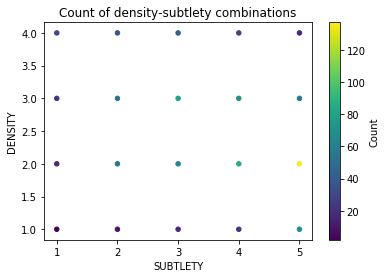

In [168]:
fig, ax = plt.subplots()
den_sub.plot.scatter(x='SUBTLETY', y='DENSITY', c='Count', colormap='viridis', ax=ax)
pl.title("Count of density-subtlety combinations")
pl.xlabel("SUBTLETY")
pl.ylabel("DENSITY")
plt.show()

In [57]:
# sprawdzic skalę subtlety wg BI-RADS

In [58]:
# gestosc kontra które zaburzenie - wykresy i tabelka
# subtlety kontra które zaburzenie - wykresy i tabelka

In [59]:
# zaburzenia o roznych gestosciach
# konkretne zaburzenie 1 o roznych gestosciach
# konkretne zaburzenie 2 o roznych gestosciach

In [60]:
# dodac subtlety
# dodac assesment

In [61]:
# ASSESSMENT to jest BI-RADS i to można porównać z gęstością

In [62]:
# ogólnie chodzi o to żeby zróżnicować przypadki łatwe od trudnych

In [63]:
asessm_sub = all_cancer.groupby(['ASSESSMENT', 'DENSITY']).size().rename("Count").reset_index()

In [64]:
asessm_sub = asessm_sub.astype('int32')

In [96]:
asessm_sub = asessm_sub.drop([17])

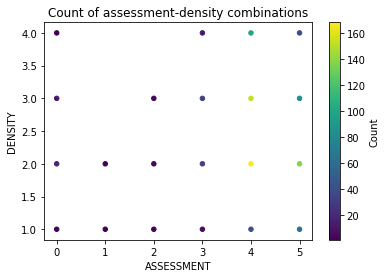

In [97]:
fig, ax = plt.subplots()
asessm_sub.plot.scatter(x='ASSESSMENT', y='DENSITY', c='Count', colormap='viridis', ax=ax)
pl.title("Count of assessment-density combinations")
pl.xlabel("ASSESSMENT")
pl.ylabel("DENSITY")
plt.show()

In [287]:
normal_density_counts = normals_df.groupby(['DENSITY']).size().rename("normal").reset_index()
normal_density_counts['percentage'] = round(normal_density_counts['normal']/len(normals_df), 3)

In [288]:
normal_density_counts

,DENSITY,normal,percentage
0,1,98,0.141
1,2,253,0.365
2,3,193,0.278
3,4,150,0.216


In [262]:
all_abnormal = pd.concat([all_cancer, all_benign], axis=0)

In [263]:
all_abnormal.shape

(1777, 20)

In [264]:
all_spiculated = all_abnormal.loc[all_abnormal['LESION_TYPE'].str.contains("MARGINS SPICULATED")]

In [265]:
all_arch_dist = all_abnormal.loc[all_abnormal['LESION_TYPE'].str.contains("ARCHITECTURAL_DISTORTION")]

In [281]:
density_counts = all_arch_dist.groupby(['DENSITY']).size().rename("architectural_distortion").reset_index()
density_counts['Percentage'] = round(density_counts['architectural_distortion']/len(all_arch_dist), 3)

In [282]:
density_counts = density_counts.reset_index(drop=True)

In [283]:
density_counts = density_counts.rename(columns={"Percentage":'architectural distortion'})

In [289]:
density_counts

,DENSITY,architectural_distortion,architectural distortion
0,1,7,0.068
1,2,31,0.301
2,3,44,0.427
3,4,21,0.204


In [276]:
margin_density_counts = all_spiculated.groupby(['DENSITY']).size().rename("margins_spiculated").reset_index()
margin_density_counts['Percentage'] = round(margin_density_counts['margins_spiculated']/len(all_spiculated), 3)

In [277]:
margin_density_counts = margin_density_counts.reset_index(drop=True)

In [278]:
margin_density_counts = margin_density_counts.rename(columns={"Percentage":'margin percentage'})

In [279]:
margin_density_counts

,DENSITY,margins_spiculated,margin percentage
0,1,37,0.155
1,2,99,0.414
2,3,66,0.276
3,4,37,0.155


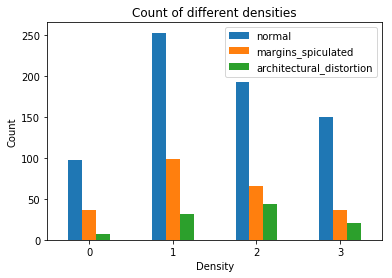

In [290]:
pd.concat([normal_density_counts, density_counts, margin_density_counts], axis=1)[['DENSITY','normal', 'margins_spiculated','architectural_distortion']].plot(kind='bar')
pl.title("Count of different densities")
pl.xlabel("Density")
pl.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [80]:
assesment_counts = all_cancer.groupby(['ASSESSMENT']).size().rename("Count").reset_index()  
assesment_counts['Percentage'] = round(assesment_counts['Count']/len(all_cancer), 3)

In [81]:
assesment_counts

,ASSESSMENT,Count,Percentage
0,0,34,0.037
1,1,2,0.002
2,2,8,0.009
3,3,84,0.092
4,4,462,0.505
5,5,324,0.354


In [84]:
subtlety_counts = all_cancer.groupby(['SUBTLETY']).size().rename("Count").reset_index()  
subtlety_counts['Percentage'] = round(subtlety_counts['Count']/len(all_cancer), 3)

In [86]:
subtlety_counts

,SUBTLETY,Count,Percentage
0,1,72,0.079
1,2,152,0.166
2,3,204,0.223
3,4,205,0.224
4,5,281,0.307
